[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FerneyOAmaya//DataLiteracy/blob/master/Caida_friccion.ipynb)

# Movimiento vertical de una esfera en un fluido viscoso

Página realizada empleando la herramienta Google Colab para presentar un caso de modelado de un fenómeno físico empleando Python.

Por:

Ferney Amaya Fernández <br>
https://ferneyoamaya.github.io/
<br><br>

## Descripción

Para un objeto que cae:

- $\rho_f [kg/m^3]$, densidad del medio.
- $\rho_e [kg/m^3]$, densidad del objeto que cae en el medio.
- $\eta [kg/(m.s)]$, viscosidad.
- $R [m]$, radio del objeto, asumiendo que es esférico.
- $g [m/s^2]$, aceleración de la gravedad.

Se define:
$$\large G = (1 - (\rho_f / \rho_e))g$$
<br>
$$\large k = \frac{9 \eta}{2 \rho_e R^2}$$

La ecuación de movimiento:

$$\large \frac{dv}{dt} = G - k v $$

Integrando la ecuación de movimiento:

$$\int_{v_0}^{v} \frac{dv}{G - kv} = \int_{0}^{t} dt$$

<br>
Se obtiene la ecuación para la velocidad:
<br>
$$\large v = \frac{G}{k} - \frac{G - k v_0}{k} e^{-kt} $$

<br>
La ecuación para obtener la posición:

$$x = \int_{0}^{t} vdt $$

resolviendo:

$$\large x = \frac{G}{k}t + \frac{G - kv_0}{k^2}(e^{-kt} - 1)$$

Tomado de:
- Notas de clase profesor Juan Serna
- http://www.sc.ehu.es/sbweb/fisica3/fluidos/stokes/stokes.html

Tramas requeridas en el video:  71


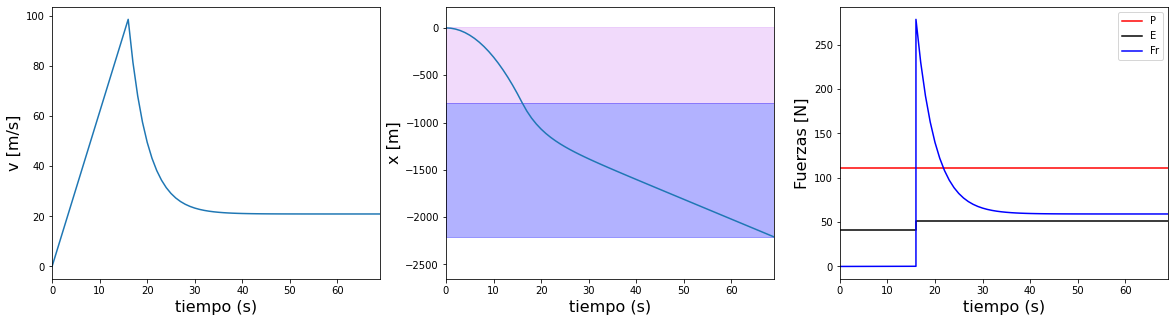

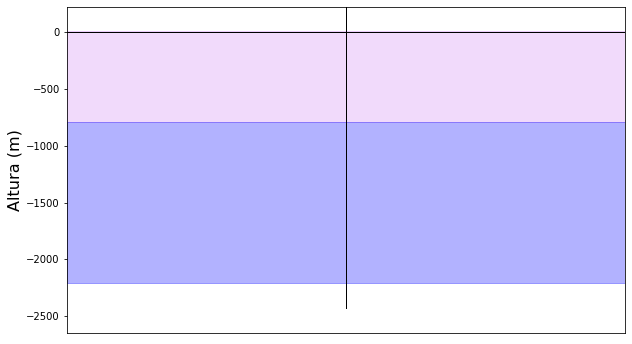

In [ ]:
#@title Entrada de datos
Radio_mm = '100' #@param ['10', '100']
Medio_1 = 'Agua'  #@param ['Agua', 'Glicerina', 'Aceite']
Medio_2 = 'Glicerina'  #@param ['Agua', 'Glicerina', 'Aceite']

tpasof = 1
Medio_dic_a = {'Agua':500,'Glicerina':20,'Aceite':500}
a_1, a_2 = Medio_dic_a[Medio_1], Medio_dic_a[Medio_2]

if Medio_1 == 'Agua' and Radio_mm == '100':
  a_1 = 800
  a_2 = 1400 if Medio_2 == 'Glicerina' else 15000

if Medio_1 == 'Glicerina' and Radio_mm == '100' and Medio_2 == 'Glicerina':
  tpasof = 0.1

R = float(Radio_mm)*1e-3  #m Radio, esfera
tam_punto = 40 if Radio_mm == '10' else 80

Medio_dic = {'Agua':[1000, 1e-3], 'Glicerina':[1258, 1.5],'Aceite':[917,0.03]}
rho_f_1, rho_f_2 = Medio_dic[Medio_1][0], Medio_dic[Medio_2][0]
nv_1, nv_2 = Medio_dic[Medio_1][1], Medio_dic[Medio_2][1]

import numpy as np
import matplotlib.pyplot as plt

tpaso_af = 100       #[ms]   Tiempo de paso animación
g = 9.8              #m/s^2, gravedad
rho_e = 2700         #kg/m^3 densidad esfera, aluminio

V = (4/3)*np.pi*R**3  
m = rho_e*V           

G = (1-rho_f_1/rho_e)*g
k = 9*nv_1/(2*rho_e*R**2)
t_1 = np.array([0])
x_1 = np.array([0])
while True:
  tt = t_1[-1] + tpasof
  xt = (G/k)*tt + (G/k**2)*(np.exp(-k*tt) - 1) 
  if xt > a_1:
    break
  t_1 = np.append(t_1, [tt])
  x_1 = np.append(x_1, [xt]) 

v_1  = (G/k)*(1 - np.exp(-k*t_1))
P_1  = m*g*np.ones((len(t_1),1))         
E_1  = rho_f_1*V*g*np.ones((len(t_1),1)) 
Fr_1 = 6*np.pi*R*nv_1*v_1                

G = (1-rho_f_2/rho_e)*g
k = 9*nv_2/(2*rho_e*R**2)
v0 = v_1[-1]
t_2 = np.array([0])
x_2 = np.array([0])
while True:
  tt = t_2[-1] + tpasof
  xt = (G/k)*tt + ((G - k*v0)/k**2)*(np.exp(-k*tt) - 1) 
  t_2 = np.append(t_2, [tt])
  x_2 = np.append(x_2, [xt]) 
  if xt > a_2:
    break

xdiv = x_1[-1]
v_2  = (G/k) - (G - k*v0)*np.exp(-k*t_2)/k
P_2  = m*g*np.ones((len(t_2),1))          
E_2  = rho_f_2*V*g*np.ones((len(t_2),1))  
Fr_2 = 6*np.pi*R*nv_2*v_2                 

tf = np.append(t_1, t_2 + t_1[-1])
xf = - np.append(x_1, x_2 + x_1[-1])
vf = np.append(v_1, v_2)
Pf = np.append(P_1, P_2)
Ef = np.append(E_1, E_2)
Frf = np.append(Fr_1, Fr_2)

Ffm, Flab = (1,'') if max(np.concatenate((Pf,Ef, Frf))) > 1 else (1e3,'m')

xtopf = -xf[-1]*0.1
xbotf =  xf[-1]*1.2
tmaxf =  tf[-1]
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(tf, vf)
ax[0].set_xlim((0, tmaxf))
ax[0].set_xlabel('tiempo (s)', fontsize=16)
ax[0].set_ylabel('v [m/s]', fontsize=16)
ax[1].plot(tf, xf)
ax[1].set_xlim((0, tmaxf))
ax[1].set_ylim(bottom = xbotf, top= xtopf)
ax[1].set_xlabel('tiempo (s)', fontsize=16)
ax[1].set_ylabel('x [m]', fontsize=16)
rec_r = plt.Rectangle((0, -xdiv), tmaxf, a_1, color='#d187f5',alpha=0.3)
rec_b = plt.Rectangle((0, xf[-1]), tmaxf, -xf[-1]-xdiv, color='b',alpha=0.3)

ax[1].add_artist(rec_r)
ax[1].add_artist(rec_b)

ax[2].plot(tf, Pf*Ffm,'r')
ax[2].plot(tf, Ef*Ffm,'k')
ax[2].plot(tf, Frf*Ffm,'b')
ax[2].set_xlim((0, tmaxf))
ax[2].set_xlabel('tiempo (s)', fontsize=16)
ax[2].set_ylabel('v [m/s]', fontsize=16)
ax[2].set_ylabel(f'Fuerzas [{Flab}N]', fontsize=16)
ax[2].legend(['P','E','Fr'])
fig.show()

print('Tramas requeridas en el video: ', len(tf))

#@title Figura de base
# create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# set up the subplots as needed
ax.set_xlim((0, 2))           
ax.set_ylim(bottom = xbotf, top = xtopf)
ax.set_ylabel('Altura (m)', fontsize=16)
ax.get_xaxis().set_visible(False)

txt_title = ax.set_title('')
pt1, = ax.plot([], [], 'g.', ms=tam_punto)
pt2, = ax.plot([], [], 'r', lw=2, ms=20)
pt3, = ax.plot([], [], 'b--', lw=1)
xpta = np.arange(0,2+0.1,0.1)
ypta = np.zeros((len(xpta),1))
ax.plot(xpta,ypta,'k',lw=1)
ypta = np.arange(xtopf,xbotf,xbotf/10)
xpta = 1.00*np.ones((len(ypta),1))
ax.plot(xpta,ypta,'k',lw=1)
rec_r = plt.Rectangle((0, -xdiv), tmaxf, a_1, color='#d187f5',alpha=0.3)
rec_b = plt.Rectangle((0, xf[-1]), tmaxf, -xf[-1]-xdiv, color='b',alpha=0.3)
ax.add_artist(rec_r)
ax.add_artist(rec_b)
txan1 = ax.annotate('', xy=(0, 0))
txan1.set_animated(True)
txan2 = ax.annotate('', xy=(0, 0))
txan2.set_animated(True)

In [ ]:
#@title Video
ntotf = len(tf)
def drawframe(n):
    trf = tf[n]                  
    xg1f = xf[n]
    vg1f = vf[n]
    tg2f = 0.5*tf[0:n+1]/tmaxf + 1.00
    xg2f = xf[0:n+1]
    E2f = Ef[n]
    P2f = Pf[n]
    Fr2f = Frf[n]
    Ffm, Flab = (1,'') if max(E2f, P2f, Fr2f) > 1 else (1e3,'m')
    E2f = E2f*Ffm
    P2f = P2f*Ffm
    Fr2f = Fr2f*Ffm
    pt1.set_data(0.50, xg1f)
    pt2.set_data(tg2f, xg2f)
    tg3f= np.arange(0,2+0.1,0.1)
    xg3f= xg1f*np.ones((len(tg3f),1))
    pt3.set_data(tg3f,xg3f)
    txan1.set_position((0.16,xg1f))
    txan1.set_text('\u2191E+Fr {0:.0f}{2}N\n\u2193 P     {1:.0f}{2}N'.format(E2f+Fr2f,P2f,Flab))
    txan2.set_position((0.58,xg1f))
    txan2.set_text('v {:5.2f}m\s \n'.format(vg1f))
    txt_title.set_text('De {} ({}m) a {} ({}m) : Trama {:d}; Tiempo {:.1f}s/{:.1f}s'.format(Medio_1, a_1, Medio_2, a_2 ,n,trf,tmaxf))
    return pt1, pt2, pt3, txan1, txan2

from matplotlib import animation

anim = animation.FuncAnimation(fig, drawframe, frames=ntotf, interval=tpaso_af, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())